C:\Users\LEONARDO\AppData\Local\Temp\ipykernel_101192\3451745706.py:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['periodo'] = pd.to_datetime(df['periodo'])


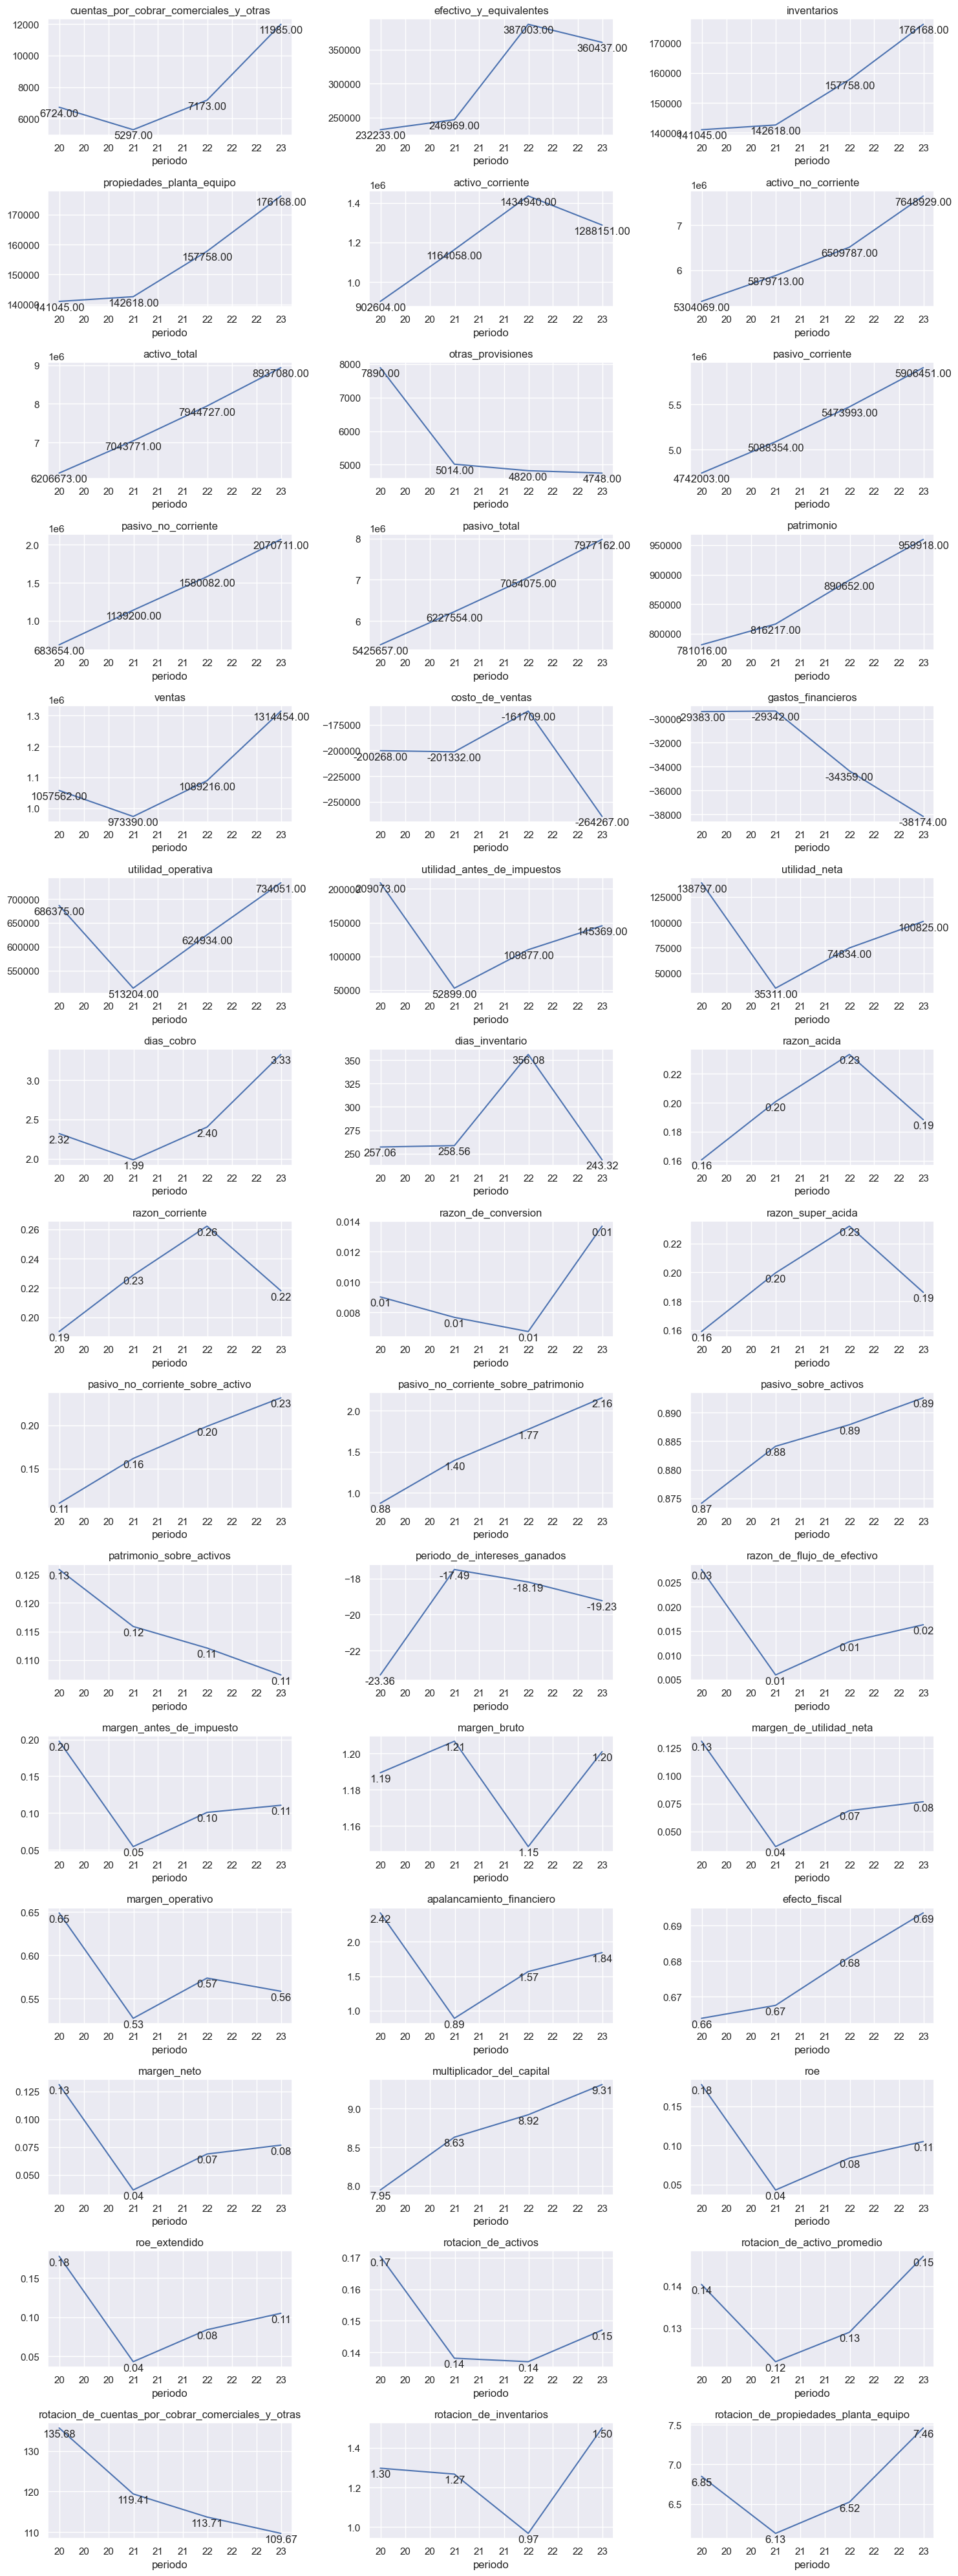

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from matplotlib.dates import DateFormatter
sns.set_theme(style="darkgrid")

# Load the data
df = pd.read_csv('calculado.csv')

# Convert 'periodo' to datetime
df['periodo'] = pd.to_datetime(df['periodo'])

# Identify the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the date format
date_form = DateFormatter("%y")  # Use '%y' for the last two digits of the year

# Calculate the number of rows and columns for the subplots
n = len(numeric_cols)
ncols = 3
nrows = math.ceil(n / ncols)

# Create a 2D layout for the subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 40))
axs = axs.ravel()  # Flatten the array of axes

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.lineplot(x='periodo', y=col, data=df, ax=axs[i])
    axs[i].set_title(col)
    axs[i].xaxis.set_major_formatter(date_form)
    axs[i].set_ylabel('')  # Remove the y-axis label

    # Add labels to the line
    for x, y in zip(df['periodo'], df[col]):
        label = f'{y:.2f}'
        axs[i].annotate(label, (x, y), textcoords="offset points", xytext=(0,-10), ha='center')

# Remove the extra subplots
for j in range(i+1, nrows*ncols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()